In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotnine as p9
import matplotlib.animation as animation

In [3]:
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

FileNotFoundError: [Errno 2] No such file or directory: '../data/bokeh/gfmt_sleep.csv'

In [4]:
iris = pd.read_csv("dataviz/dataviz/scatter-plot/data/iris.data")

setosa = iris[iris['Class'] == 'Iris-setosa']
versicolor = iris[iris['Class'] == 'Iris-versicolor']
virginica = iris[iris['Class'] == 'Iris-virginica']

FileNotFoundError: [Errno 2] No such file or directory: 'dataviz/dataviz/scatter-plot/data/iris.data'

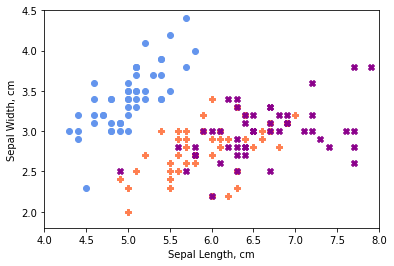

In [52]:
fig, ax = plt.subplots()
ax.set_xlim(4.0, 8.0)
ax.set_ylim(1.8, 4.5)
ax.set_xlabel('Sepal Length, cm')
ax.set_ylabel('Sepal Width, cm')

plt.scatter(setosa['Sepal-Length'], setosa['Sepal-Width'], marker='o', color='cornflowerblue')
plt.scatter(versicolor['Sepal-Length'], versicolor['Sepal-Width'], marker='P', color='coral')
plt.scatter(virginica['Sepal-Length'], virginica['Sepal-Width'], marker='X', color='darkmagenta')

In [4]:
digimon = pd.read_csv("barchart/data/digimon/DigiDB_digimonlist.csv")

In [5]:
digimon.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


<AxesSubplot:ylabel='Digimon'>

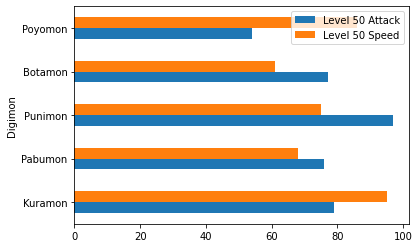

In [18]:
digimon.head().plot.barh(x='Digimon', y=['Lv50 Atk', 'Lv50 Spd'], label=['Level 50 Attack', 'Level 50 Speed'])

[Text(0, 0, 'Lv50 SP'),
 Text(1, 0, 'Lv50 Atk'),
 Text(2, 0, 'Lv50 Def'),
 Text(3, 0, 'Lv50 Int'),
 Text(4, 0, 'Lv50 Spd')]

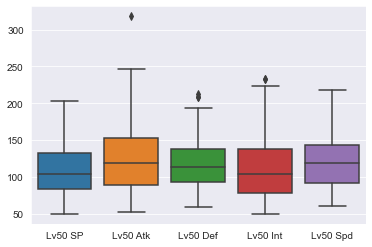

In [45]:
xticks = ['Lv50 SP', 'Lv50 Atk', 'Lv50 Def', 'Lv50 Int', 'Lv50 Spd']

sns.set_style("darkgrid")
plot = sns.boxplot(data=[digimon[tick] for tick in xticks])
plot.set_xticklabels(xticks)

/Users/s.gulyamov/Library/Python/3.10/lib/python/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 10'. Pick better value with 'binwidth'.


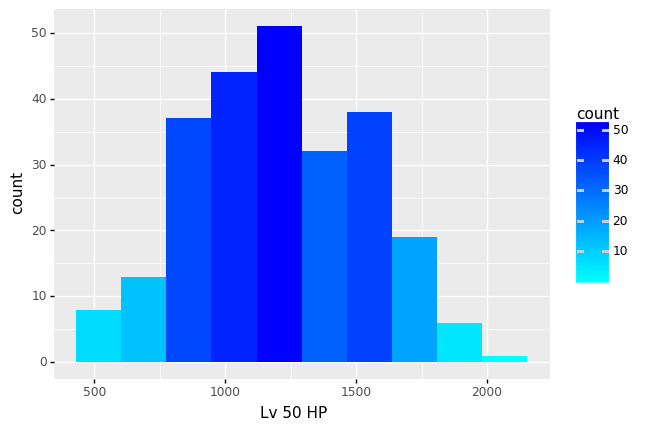

<ggplot: (374892538)>

In [16]:
(p9.ggplot(data=digimon, 
           mapping=p9.aes(x='Lv 50 HP', fill='..count..'))
 + p9.scale_fill_gradient(low='cyan', high='blue') + p9.geom_histogram())

<IPython.core.display.Javascript object>


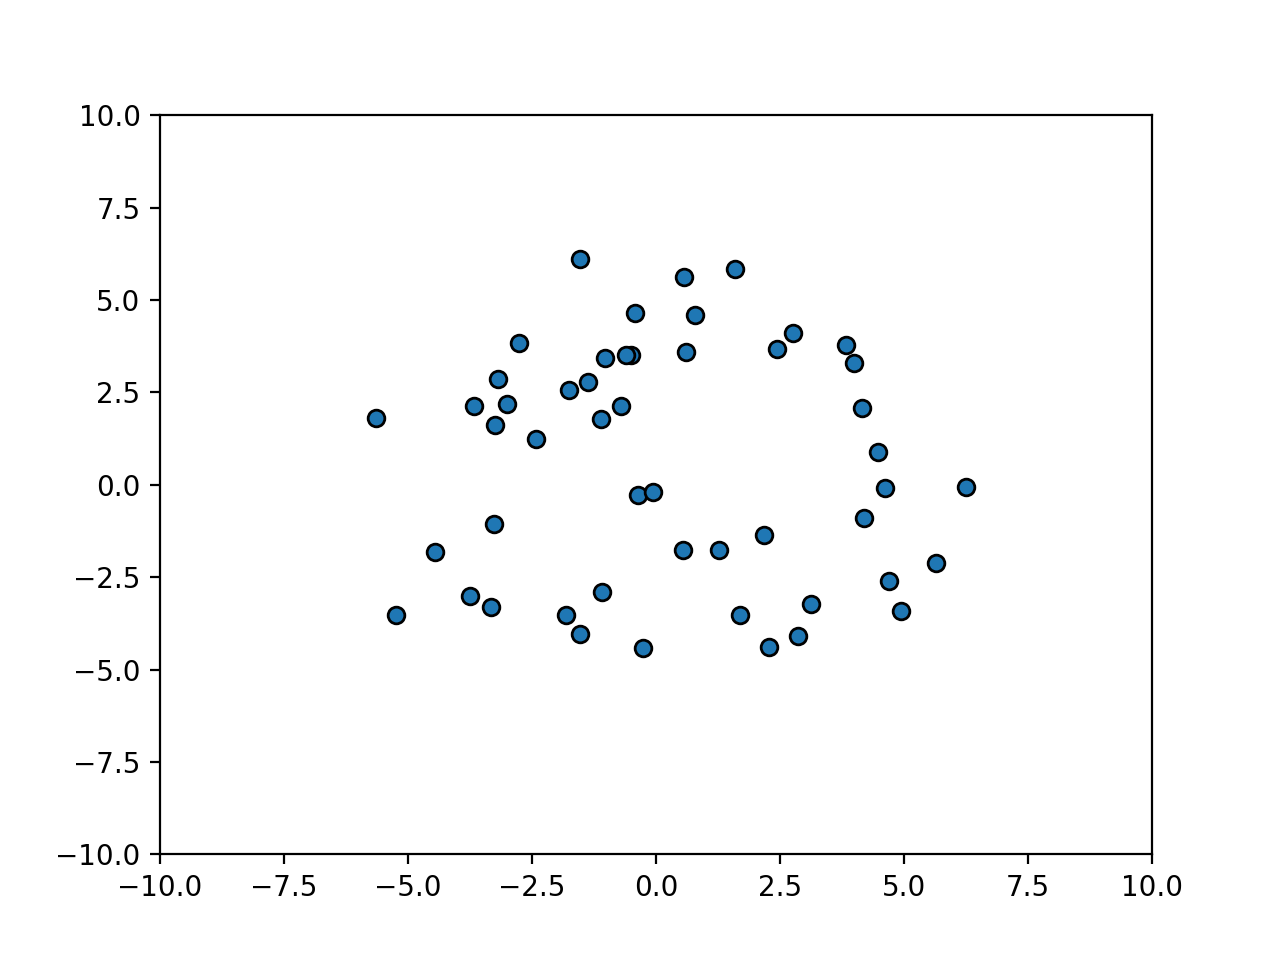

In [3]:



class BrownianMotion(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, numpoints=50):
        self.numpoints = numpoints

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5, 
                                          init_func=self.setup_plot, blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        self.x = (np.random.random(self.numpoints)-0.5)*10
        self.y = (np.random.random(self.numpoints)-0.5)*10
        self.scat = self.ax.scatter(self.x, self.y, vmin=0, vmax=1,
                                    cmap="jet", edgecolor="k")
        self.ax.axis([-10, 10, -10, 10])
        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self, offset=0.03):
        self.x += offset * (np.random.random(self.numpoints)-0.5)
        self.y += offset * (np.random.random(self.numpoints)-0.5)
        return np.c_[self.x, self.y]
        """Generate a random walk (brownian motion). Data is scaled to produce
        a soft "flickering" effect.
        xy = (np.random.random((self.numpoints, 2))-0.5)*10
        s, c = np.random.random((self.numpoints, 2)).T
        while True:
            xy += 0.03 * (np.random.random((self.numpoints, 2)) - 0.5)
            s += 0.05 * (np.random.random(self.numpoints) - 0.5)
            c += 0.02 * (np.random.random(self.numpoints) - 0.5)
            yield np.c_[xy[:,0], xy[:,1], s, c]"""

    def update(self, i):
        """Update the scatter plot."""
        data = self.data_stream(offset=0.5)

        # Set x and y data...
        self.scat.set_offsets(data)
        # Set sizes...
        #self.scat.set_sizes(300 * abs(data[:, 2])**1.5 + 100)
        # Set colors..
        #self.scat.set_array(data[:, 3])

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,


if __name__ == '__main__':
    a = BrownianMotion()
    plt.show()

<IPython.core.display.Javascript object>


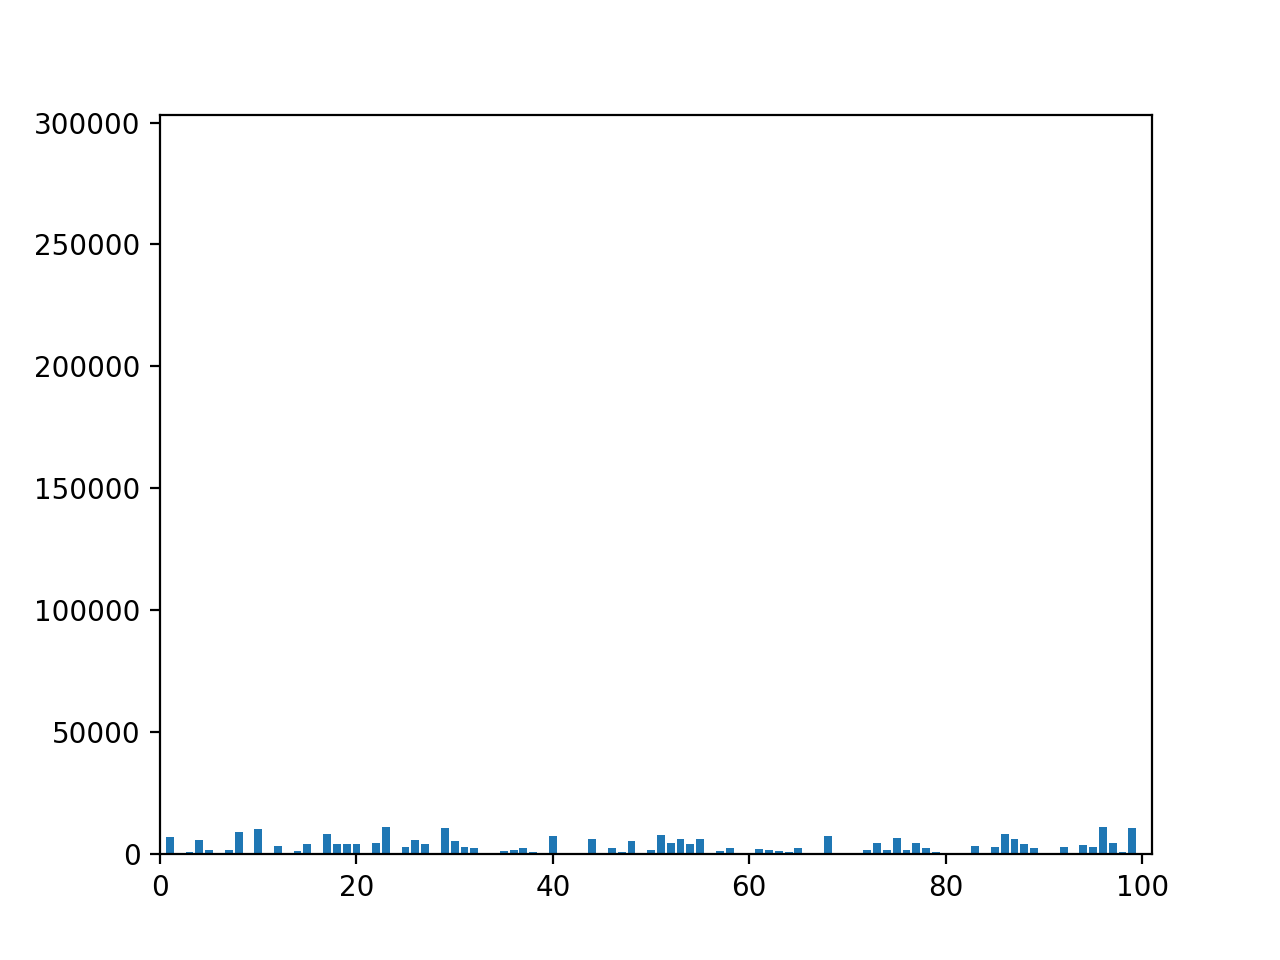

In [5]:
class RandomTransactions():
    def __init__(self, participants=100, starting_money=3000, transaction_amount=1000):
        self.starting_money = starting_money
        self.current_money = [starting_money]*participants
        self.p_num = participants
        self.transaction = transaction_amount
        self.fig, self.ax = plt.subplots()
        
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=1, 
                                          init_func=self.setup_plot, blit=True)
    
    def setup_plot(self):
        self.x = [i for i in range(1, len(self.current_money) + 1)]
        self.y = self.current_money
        
        self.bar = self.ax.bar(self.x, self.y)
        
        self.ax.axis([0, self.p_num + 1, 0, (self.p_num + 1)*self.starting_money])
        
        return self.bar,
    
    def data_stream(self):
        random_creditor = np.random.choice([i for i in range(self.p_num)])
        random_debitor = np.random.choice([i for i in range(random_creditor)] + 
                                          [i for i in range(random_creditor + 1, self.p_num)])
        print(random_creditor, random_debitor)
        return (random_creditor, random_debitor)
    
    def update(self, i):
        creditor, debitor = self.data_stream()
        rng = np.random.randint(1, self.current_money[creditor])
        self.current_money[creditor] -= rng
        self.current_money[debitor] += rng
        
        for i, b in enumerate(self.bar):
            b.set_height(self.current_money[i])
        self.bar
RandomTransactions()

In [1]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
p = figure(title='Simple Line', x_axis_label='x', y_axis_label='y')
p.line(x, y)
show(p)

In [11]:
a

{3, 5}

In [1]:
import random

In [3]:
random.randint(1, 2)

2

In [9]:
def random_string(length, alphabet):
    n = len(alphabet)
    return [alphabet[random.randint(0, n-1)] for _ in range(length)]

In [10]:
random_string(, 'ab')

['b', 'b']

In [42]:
a = []
for _ in range(30):
    i = random.randint(1, 2)
    if i == 1: a.append('I' + str(random.randint(0, 50)))
    if i == 2: a.append('S')

In [43]:
print(a)

['S', 'I18', 'S', 'I12', 'S', 'I24', 'S', 'I50', 'S', 'I21', 'S', 'S', 'S', 'I14', 'S', 'S', 'S', 'S', 'S', 'S', 'I25', 'I4', 'S', 'I27', 'I2', 'I21', 'I50', 'I17', 'S', 'I10']


In [18]:
(2< 3) is not False

True

In [26]:
def modify(st):
    return 'def test_' + st.replace('.', '').replace(',', '').replace(' ', '_').lower() + '():\n\n'

In [28]:
print(modify('ABC AS,'))

def test_abc_as():




In [44]:
def enter_tests(test_num):
    test_names = [input().strip() for _ in range(test_num)]
    for name in test_names:
        print(modify(name))

In [45]:
enter_tests(10)

can be hand-computed.
less effective vaccine results in a longer epidemic
Different seed
Large number of trials.
 	  Large number of trials with a different seed.
30 person city, effective vaccine, and few days contagious
49 person city, less effective vaccine, few days contagious.
 	  Edge case: 1 trial
Edge case: 100% effective vaccine
Edge case: population is already recovered, so all simulations should return zero days.
def test_can_be_hand-computed():


def test_less_effective_vaccine_results_in_a_longer_epidemic():


def test_different_seed():


def test_large_number_of_trials():


def test_large_number_of_trials_with_a_different_seed():


def test_30_person_city_effective_vaccine_and_few_days_contagious():


def test_49_person_city_less_effective_vaccine_few_days_contagious():


def test_edge_case:_1_trial():


def test_edge_case:_100%_effective_vaccine():


def test_edge_case:_population_is_already_recovered_so_all_simulations_should_return_zero_days():


